In [19]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [21]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

In [22]:
rng.normal(size=size)

array([-0.51953479, -0.08841382,  0.45679335, -0.3578742 ,  0.84069994,
       -0.0508384 ,  0.29213688,  0.31563007, -0.01298811, -1.08563365,
       -0.38742107, -0.0796362 , -0.06247863,  2.7269218 , -0.71348651,
       -0.50346182,  0.98088342, -0.3149847 ,  1.1165858 , -1.58843384,
        0.14319632, -0.57259823, -0.92328721,  1.0649091 , -0.92631251,
        0.50958623, -1.24856497,  0.71405325,  0.07162526, -1.33597726,
       -1.39114059, -0.07448202,  0.17775829,  0.39116772,  2.32734576,
        1.36393171,  0.90771231, -1.35902856,  0.70002363,  0.38400209,
        2.72304322,  1.32736702,  0.69797477,  0.78547711, -0.78149481,
        1.11591286, -0.6634758 ,  0.53491819, -0.36537325,  0.26609353,
       -0.8161268 , -0.26435796,  0.19172789, -1.13250115,  2.22183858,
       -0.96303181,  1.27240529,  0.3797309 ,  0.32228824,  0.58021649,
       -0.16730569,  0.74066925, -0.67315391, -0.45301272, -0.70089822,
        1.668035  ,  0.34614484, -0.01417841, -0.46887032,  0.29

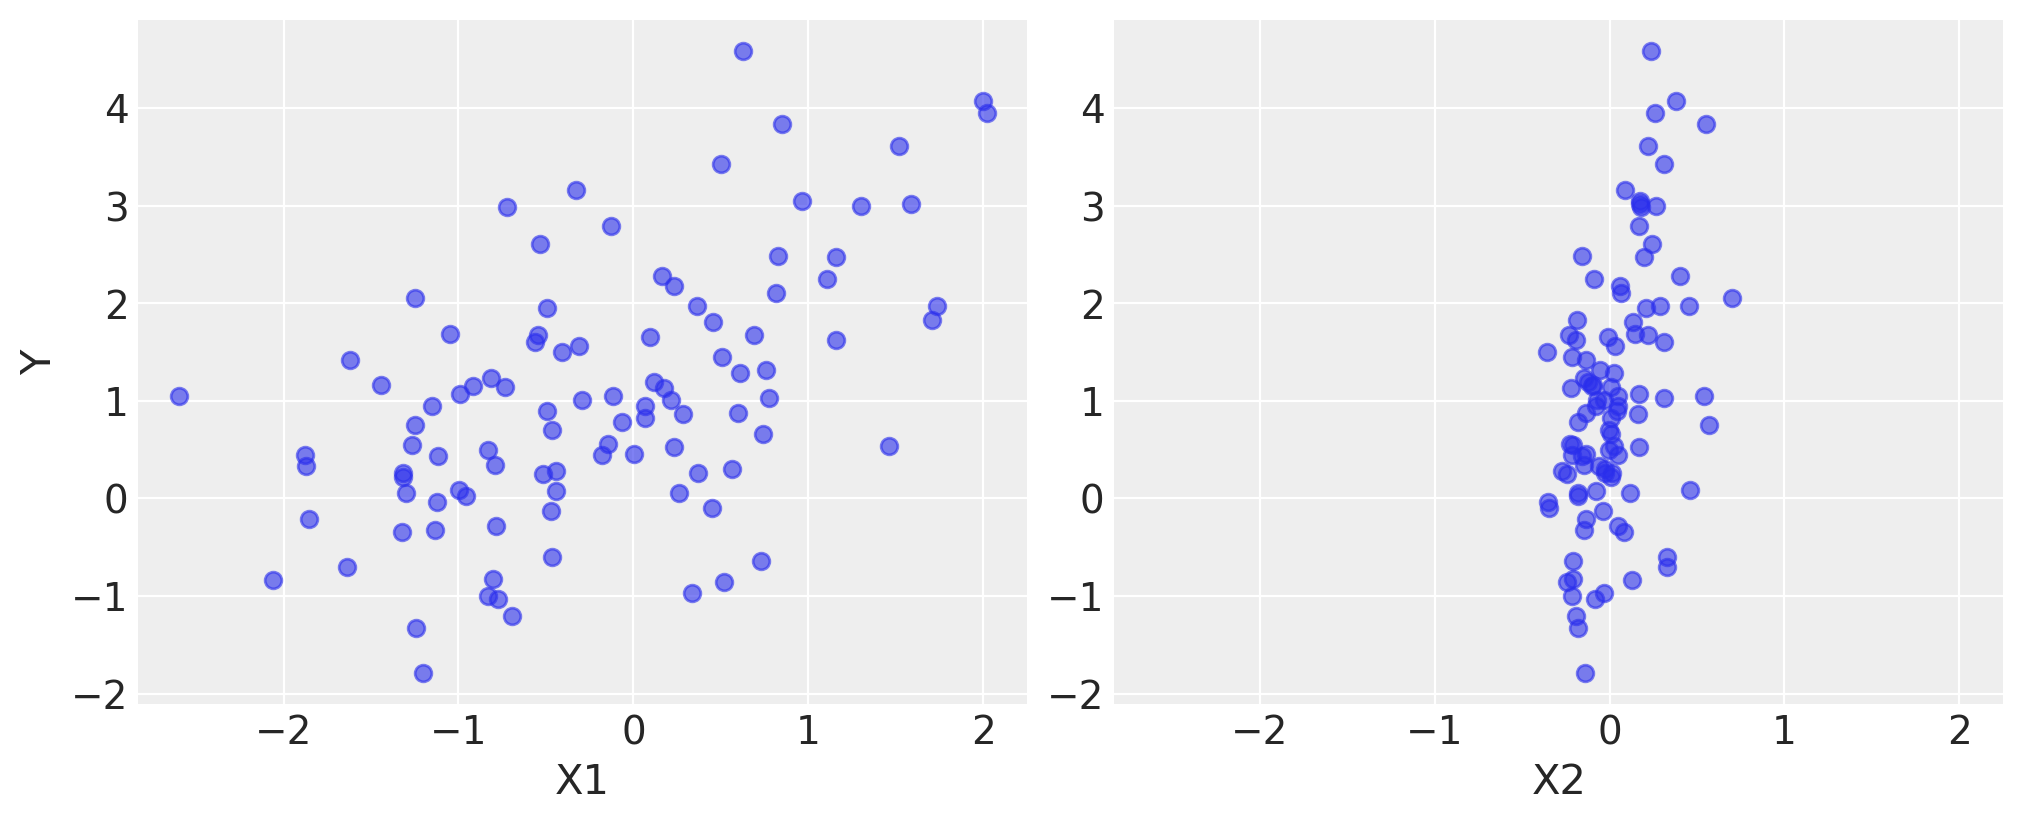

In [23]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [24]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.0.0b5


In [25]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [26]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/envs/bayes_env/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [14]:
idata


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [27]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.0906522 , 1.10517616, 1.10517616, 1.01238061, 1.17170477],
       [1.16081068, 1.03890561, 1.24736415, 1.10883078, 1.13377407],
       [1.2576254 , 0.86305415, 1.0630207 , 1.05571415, 1.10973325],
       [1.13279447, 0.9860302 , 1.00569007, 0.99744666, 1.19141717]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

In [28]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 31 seconds.


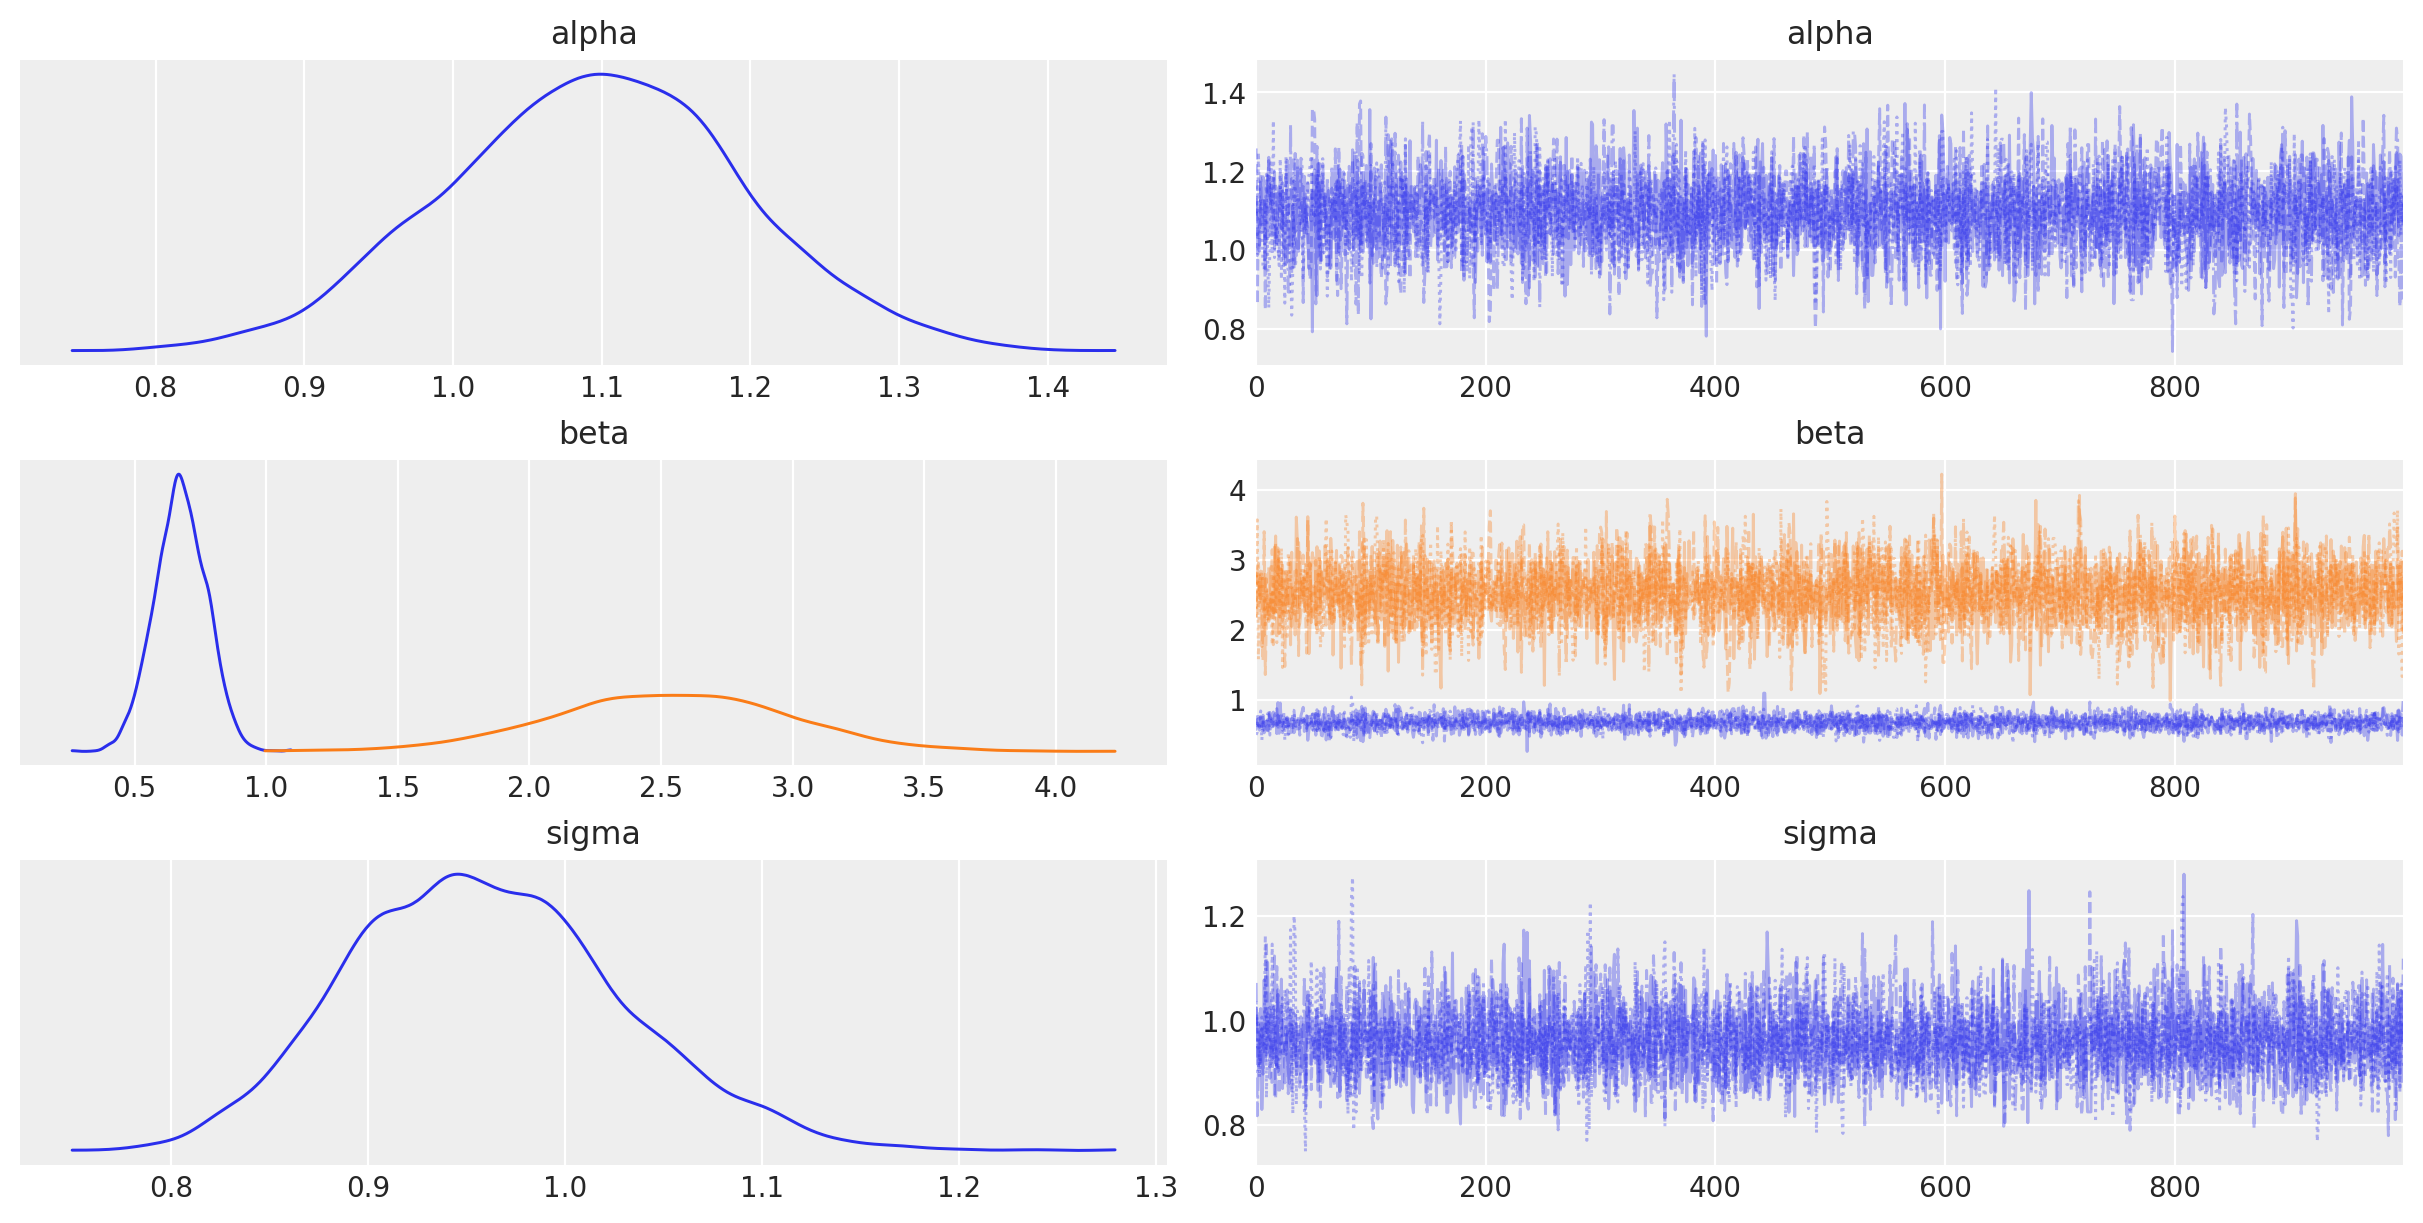

In [29]:
az.plot_trace(idata, combined=True);


In [30]:
az.summary(idata, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.09,0.10,0.92,1.28,0.00,0.0,5037.10,3147.25,1.0
beta[0],0.68,0.10,0.49,0.86,0.00,0.0,6161.50,3049.21,1.0
beta[1],2.53,0.45,1.74,3.41,0.01,0.0,4631.69,3076.75,1.0
sigma,0.96,0.07,0.84,1.10,0.00,0.0,5460.28,2699.64,1.0
